# Data Science Coding Challenge – Churn Prediction

## Overview
This project is part of a data science coding challenge focused on predicting **customer churn** for a video streaming service.


### Goal
Build a machine learning model that predicts whether a subscriber will **continue their subscription for another month** or **cancel**.


### Context
Subscription cancellation (“churn”) can happen for several reasons, including:

- The customer has watched all the content they wanted.
- They are too busy to use the service.
- They prefer a different platform.

Accurately predicting churn helps the company take proactive steps to **retain valuable customers**.

---

## Provided Data

1. **`train.csv`**
   - ~70% of all subscriptions (**243,787 records**)
   - Includes features describing each subscription and a target column `Churn` (*0 = retained, 1 = churned*)

2. **`test.csv`**
   - ~30% of all subscriptions (**104,480 records**)
   - Same features but **without the `Churn` label** (this is what we need to predict)

Additionally, a **`data_descriptions.csv`** file explains each feature.

---

## Train vs. Test Sets

In this challenge, you have access to two datasets that are **samples of past subscriptions** for a video streaming platform. These datasets contain information about:

- The customer
- Their streaming preferences
- Their subscription activity so far

**Datasets:**

- **`train.csv`:**
  - Contains ~70% of the overall sample (**243,787 subscriptions**)
  - Includes whether each subscription was continued into the next month (*the “ground truth”*)

- **`test.csv`:**
  - Contains the remaining ~30% (**104,480 subscriptions**)
  - Has the same information as `train.csv` but **without the target label**

**Your task:**
Using patterns you discover in `train.csv`, **predict whether each subscription in `test.csv` will be continued for another month.**

---

##  Dataset Description

Both `train.csv` and `test.csv` include:

- **One row per unique subscription**
- An identifier column: `CustomerID`
- A set of features describing the subscription, customer profile, and usage patterns

Additionally:

- `train.csv` includes the target column:
  - **`Churn`**: A binary label  
    *(0 = retained, 1 = churned)*

Apart from this label, the features are **identical** between the datasets and can be used to train your machine learning model.

A separate **`data_descriptions.csv`** file provides detailed explanations of each feature.  
Familiarize yourself with these descriptions to leverage them effectively in your modeling pipeline.

In [7]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [8]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let’s start by loading the datasets:

- `train.csv` into a dataframe called `train_df`
- `test.csv` into a dataframe called `test_df`

We’ll also display the shape of each dataframe to understand how many rows and columns are available.

In [9]:
#train
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [10]:
#test
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore Churn Distribution

To begin exploring the dataset, we:

- Filter the subscriptions that ended in churn (`Churn = 1`)
- Display the first few examples of churned customers
- Calculate the overall churn rate in the training data

Number of churned customers: 44182
Churn Rate: 18.12%


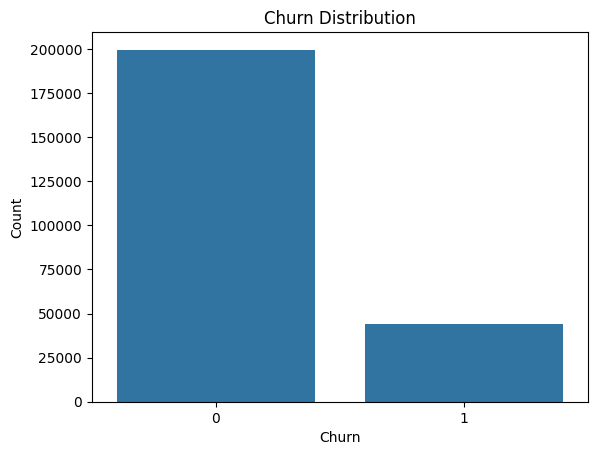

In [11]:
# Filter rows where Churn == 1
churned_customers = train_df[train_df['Churn'] == 1]

# Display the first few rows
print('Number of churned customers:', churned_customers.shape[0])
churned_customers.head()

# Proportion of churned customers
churn_rate = train_df['Churn'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

# Visualize churn counts
sns.countplot(x='Churn', data=train_df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Make Predictions

In this step, we will **generate churn predictions for the test dataset** to prepare a submission file.

**Important submission requirements:**

- **The output DataFrame must be named:**  
  `prediction_df`

- **It must have exactly 2 columns:**
  - `CustomerID`  
    *(copied from `test_df`)*
  - `predicted_probability`  
    *(numeric probabilities between 0 and 1 representing the likelihood that the subscription will churn)*


In [13]:
#Encode train set
train_df_encoded = train_df.copy()

categorical_cols = [
    'SubscriptionType',
    'PaymentMethod',
    'PaperlessBilling',
    'ContentType',
    'MultiDeviceAccess',
    'DeviceRegistered',
    'GenrePreference',
    'Gender',
    'ParentalControl',
    'SubtitlesEnabled'
]

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(train_df[col])
    train_df_encoded[col] = le.transform(train_df[col])
    encoders[col] = le   

#Compute correlations
corr_series = train_df_encoded.drop('CustomerID', axis=1).corr()['Churn']

# Sort by absolute value
corr_abs = corr_series.abs().sort_values(ascending=False)
corr_abs = corr_abs.drop('Churn')
# Top 10 predictors
top_predictors = corr_abs.head(10).index.tolist()
print("Top 10 most predictive features (by absolute value of correlation):", top_predictors)


        
X = train_df_encoded[top_predictors]
y = train_df_encoded['Churn']

# model = RandomForestClassifier(
#     n_estimators=300,
#     max_depth=10,
#     min_samples_split=5,
#     min_samples_leaf=2,
#     max_features='sqrt',
#     class_weight='balanced',
#     random_state=42,
#     n_jobs=-1
# )
# 

model = MLPClassifier(
    hidden_layer_sizes=(128,128), 
    activation='relu',
    solver='adam',
    max_iter=500,
    early_stopping=True,
    random_state=42
)

model.fit(X, y)


# Predict churn probabilities
#test 
test_df_encoded = test_df.copy()

for col in categorical_cols:
    le = encoders[col]   
    test_df_encoded[col] = le.transform(test_df[col])

X_test = test_df_encoded[top_predictors]
Y_test = model.predict_proba(X_test)[:, 1]



# Combine predictions into the required DataFrame
prediction_df = pd.DataFrame({
    'CustomerID': test_df_encoded['CustomerID'],
    'predicted_probability': Y_test
})




#Check shape and preview
print(prediction_df.shape)
prediction_df.head(10)

Top 10 most predictive features (by absolute value of correlation): ['AccountAge', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursPerWeek', 'TotalCharges', 'MonthlyCharges', 'SupportTicketsPerMonth', 'UserRating', 'WatchlistSize', 'PaymentMethod']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

(104480, 2)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.101105
1,LFR4X92X8H,0.031460
2,QM5GBIYODA,0.344837
3,D9RXTK2K9F,0.043842
4,ENTCCHR1LR,0.157164
5,7A88BB5IO6,0.414469
6,70OMW9XEWR,0.119503
7,EL1RMFMPYL,0.241952
8,4IA2QPT6ZK,0.201372
9,AEDCWHSJDN,0.182218


## Final Checks

Below are assertions to validate your submission format before uploading.

In [14]:
# FINAL TEST CELLS 

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'